In [229]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 700)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
pricedf = pd.read_pickle('src/scraping/trulia/sel_scrape/trulscraped_df.pkl')
geodf = pd.read_csv('data/Austin_addresses.csv')
lldf = pd.read_pickle('src/scraping/trulia/sel_scrape/latlonglist_full.pkl')

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [186]:
lldf = pd.DataFrame(lldf, columns=['address', 'latitude', 'longitude'])

In [187]:
pricedf = pd.DataFrame(pricedf, columns=['address', 'bathrooms', 'bedrooms', 'city_state_zip', 'house_type', 'price', 'sqft', 'url', 'price_per_sqft', 'adj_address', 'apts'])

In [188]:
lldf.head()

,address,latitude,longitude
0,4159 STECK AVENUE AUSTIN TX 78759,30.3767245,-97.7577025
1,15810 DE PEER COVE AUSTIN TX 78717,30.49254,-97.740365
2,8201 LAZY LANE AUSTIN TX 78757,30.355568,-97.717455
3,14511 FITZGIBBON DRIVE AUSTIN TX 78725,30.2343,-97.588498
4,10304 BANKHEAD DRIVE AUSTIN TX 78757,30.351538,-97.732571


In [189]:
newdf = lldf.merge(pricedf, left_on='address', right_on='adj_address', how='left')

In [190]:
newdf.drop(newdf[newdf['bedrooms'] == 'Lot/Land'].index, inplace=True)
newdf.drop(newdf[newdf['bathrooms'] == 'Condo'].index, inplace=True)
newdf.drop(newdf[newdf['sqft'] == 0].index , inplace=True)

In [191]:
newdf['bathrooms'] = newdf['bathrooms'].map(lambda x: str(x).replace('Bathrooms', '').replace('Bathroom', '').strip()).astype(float)
newdf['bedrooms'] = newdf['bedrooms'].map(lambda x: str(x).replace('Bedrooms', '').replace('Bedroom', '').strip()).astype(float)

In [192]:
newdf

,address_x,latitude,longitude,address_y,bathrooms,bedrooms,city_state_zip,house_type,price,sqft,url,price_per_sqft,adj_address,apts
0,4159 STECK AVENUE AUSTIN TX 78759,30.3767245,-97.7577025,4159 STECK AVE #102,2.0,3.0,AUSTIN TX 78759,Condo,280000,1427,https://www.trulia.com/p/tx/austin/4159-steck-...,196.215837,4159 STECK AVENUE AUSTIN TX 78759,#102
1,15810 DE PEER COVE AUSTIN TX 78717,30.49254,-97.740365,15810 DE PEER CV,3.0,4.0,AUSTIN TX 78717,Single-Family Home,299000,2224,https://www.trulia.com/p/tx/austin/15810-de-pe...,134.442446,15810 DE PEER COVE AUSTIN TX 78717,Nan
2,8201 LAZY LANE AUSTIN TX 78757,30.355568,-97.717455,8201 LAZY LN,1.0,3.0,AUSTIN TX 78757,Single-Family Home,329900,1005,https://www.trulia.com/p/tx/austin/8201-lazy-l...,328.258706,8201 LAZY LANE AUSTIN TX 78757,Nan
3,14511 FITZGIBBON DRIVE AUSTIN TX 78725,30.2343,-97.588498,14511 FITZGIBBON DR,2.0,3.0,AUSTIN TX 78725,Single-Family Home,229874,1499,https://www.trulia.com/p/tx/austin/14511-fitzg...,153.351568,14511 FITZGIBBON DRIVE AUSTIN TX 78725,Nan
4,10304 BANKHEAD DRIVE AUSTIN TX 78757,30.351538,-97.732571,10304 BANKHEAD DR,2.0,3.0,AUSTIN TX 78757,Single-Family Home,237501,1295,https://www.trulia.com/p/tx/austin/10304-bankh...,183.398456,10304 BANKHEAD DRIVE AUSTIN TX 78757,Nan
5,8505 GRAYLEDGE DRIVE AUSTIN TX 78753,30.3477435,-97.6922801,8505 GRAYLEDGE DR,3.0,3.0,AUSTIN TX 78753,Single-Family Home,320000,1538,https://www.trulia.com/p/tx/austin/8505-grayle...,208.062419,8505 GRAYLEDGE DRIVE AUSTIN TX 78753,Nan
6,1800 LAVACA STREET AUSTIN TX 78701,30.2804935,-97.7411189,1800 LAVACA ST #212,1.0,1.0,AUSTIN TX 78701,Condo,182900,594,https://www.trulia.com/p/tx/austin/1800-lavaca...,307.912458,1800 LAVACA STREET AUSTIN TX 78701,#212
7,1718 SUMMIT VIEW AUSTIN TX 78703,30.285679,-97.760843,1718 SUMMIT VW,6.0,5.0,AUSTIN TX 78703,Single-Family Home,2395000,5470,https://www.trulia.com/p/tx/austin/1718-summit...,437.842779,1718 SUMMIT VIEW AUSTIN TX 78703,Nan
8,11825 SHROPSHIRE BOULEVARD AUSTIN TX 78753,30.379248,-97.660087,11825 SHROPSHIRE BLVD,2.0,3.0,AUSTIN TX 78753,Single-Family Home,235000,1158,https://www.trulia.com/p/tx/austin/11825-shrop...,202.936097,11825 SHROPSHIRE BOULEVARD AUSTIN TX 78753,Nan
9,10200 COPPER RIDGE COVE AUSTIN TX 78747,30.1407936,-97.7666178,10200 COPPER RIDGE CV,2.0,3.0,AUSTIN TX 78747,Single-Family Home,243000,1560,https://www.trulia.com/p/tx/austin/10200-coppe...,155.769231,10200 COPPER RIDGE COVE AUSTIN TX 78747,Nan


In [211]:
X = newdf[['latitude', 'longitude']]
y = newdf['price_per_sqft']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [195]:
model = LinearRegression(normalize=True)

In [196]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [197]:
model.score(X_test, y_test)

-0.018115826176000605

Text(0, 0.5, 'longitude')

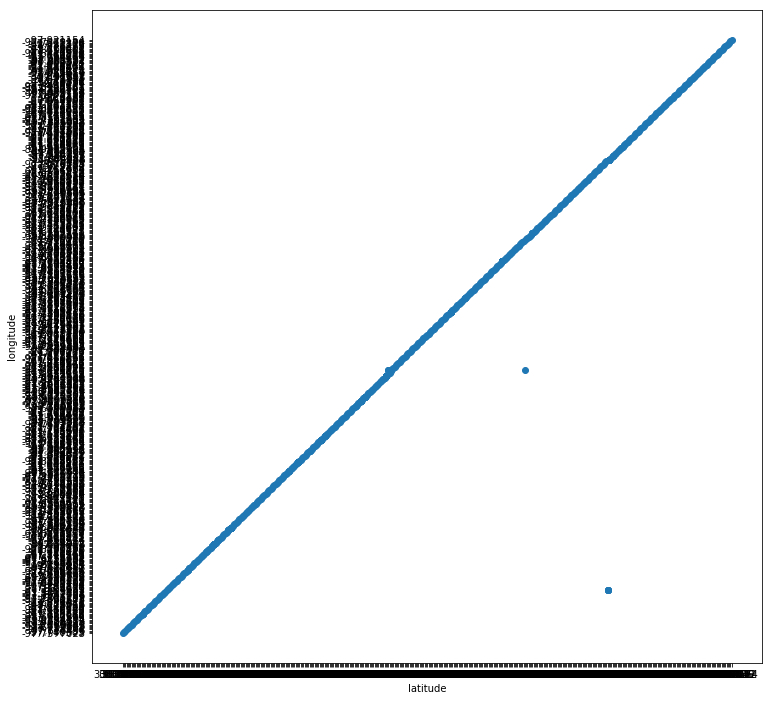

In [199]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X['latitude'], X['longitude'])
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')

Text(0, 0.5, 'per_sq_ft')

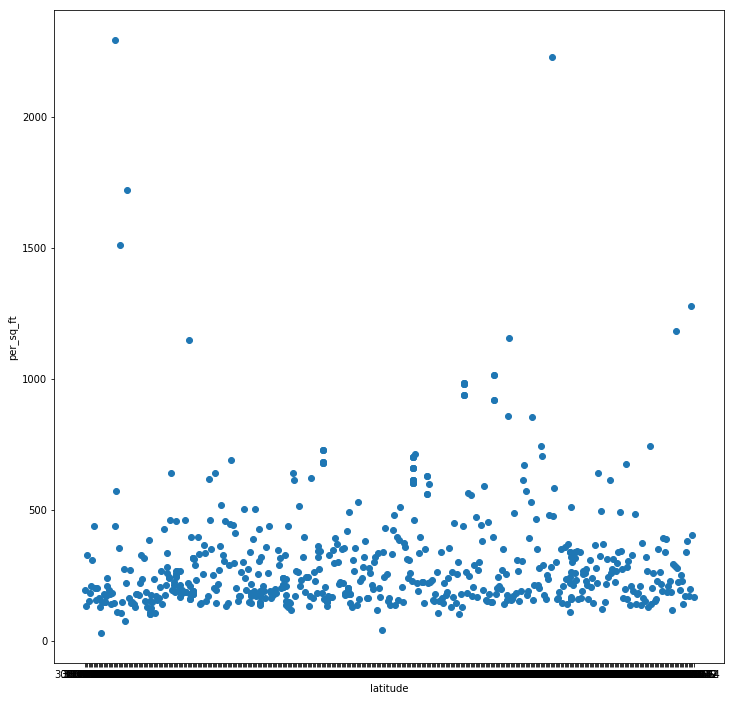

In [200]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X['latitude'], y)
ax.set_xlabel('latitude')
ax.set_ylabel('per_sq_ft')

Text(0, 0.5, 'per_sq_ft')

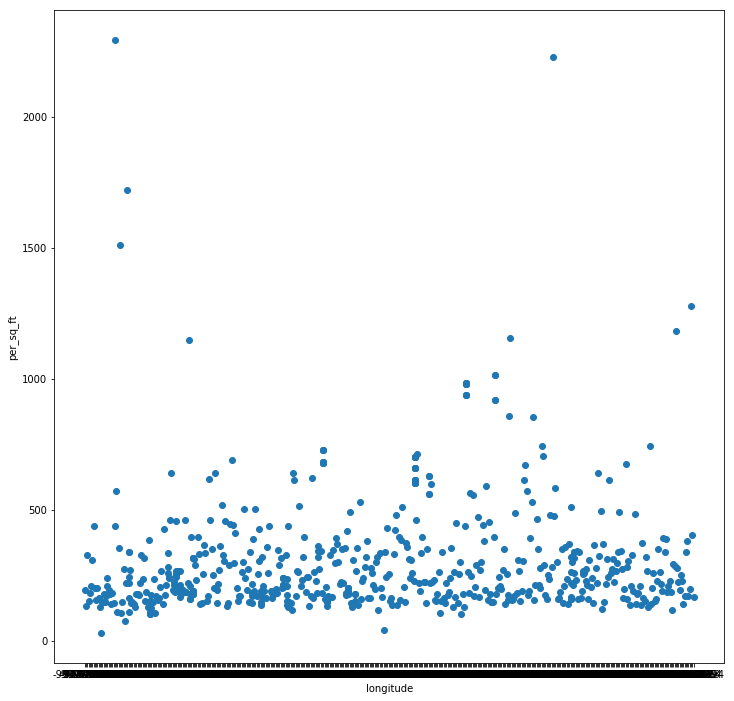

In [201]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X['longitude'], y)
ax.set_xlabel('longitude')
ax.set_ylabel('per_sq_ft')

In [208]:
newdf.longitude = newdf.longitude.astype(float)
newdf.latitude = newdf.latitude.astype(float)

In [209]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 710
Data columns (total 14 columns):
address_x         623 non-null object
latitude          623 non-null float64
longitude         623 non-null float64
address_y         623 non-null object
bathrooms         623 non-null float64
bedrooms          623 non-null float64
city_state_zip    623 non-null object
house_type        623 non-null object
price             623 non-null int64
sqft              623 non-null int64
url               623 non-null object
price_per_sqft    623 non-null float64
adj_address       623 non-null object
apts              623 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 73.0+ KB


In [217]:
tree = RandomForestRegressor(300)
tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [218]:
tree.score(X_test, y_test)

0.675841302997616

In [226]:
X = newdf[['latitude', 'longitude']]
y = newdf['price_per_sqft']
X_train, X_test, y_train, y_test = train_test_split(X, y)
tree = RandomForestRegressor(300)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.5351482412655078

In [238]:
X1 = newdf[['latitude', 'longitude']]
y1 = newdf['price_per_sqft']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
boost = GradientBoostingRegressor(learning_rate=0.01, n_estimators=800)
boost.fit(X1_train, y1_train)
boost.score(X1_test, y1_test)

0.6315024055121995

In [239]:
geodf.head()

,address,address1,address2,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_street_number,g_street,g_unit,g_city,g_state,g_zip_code,g_county,lat,lon
0,20813 PENNY ROYAL DR PFLUGERVILLE TX 78660,20813 PENNY ROYAL DR PFLUGERVILLE TX 78660,PENNY ROYAL DR PFLUGERVILLE TX 78660,20813,PENNY ROYAL DRIVE,NaN,PFLUGERVILLE,TX,78660.0,20813,Penny Royal Drive,NaN,Pflugerville,Texas,78660.0,Travis County,30.484112,-97.563114
1,10604 FOUNDATION ROAD AUS1 TN TX 78726,10604 FOUNDATION RD AUS1 TN TX 78726,FOUNDATION RD AUS1 TN TX 78726,10604,FOUNDATION ROAD,NaN,AUSTIN,TX,78726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12200 PRATOLINA DR AUSTIN TX 78739,12200 PRATOLINA DR AUSTIN TX 78739,PRATOLINA DR AUSTIN TX 78739,12200,PRATOLINA DRIVE,NaN,AUSTIN,TX,78739.0,12200,Pratolina Drive,NaN,Austin,Texas,78739.0,Travis County,30.186914,-97.928031
3,311 EVENING GROSBEAK DRIVE PFLUGERVILLE TX 78660,311 EVENING GROSBEAK DR PFLUGERVILLE TX 78660,EVENING GROSBEAK DR PFLUGERVILLE TX 78660,311,EVENING GROSBEAK DRIVE,NaN,PFLUGERVILLE,TX,78660.0,311,Evening Grosbeak Drive,NaN,Pflugerville,Texas,78660.0,Travis County,30.446861,-97.627389
4,8201 EDGEMOOR PLACE AUSTIN TX 78749,NaN,NaN,8201,EDGEMOOR PLACE,NaN,AUSTIN,TX,78749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
geodf.c_zip_code = geodf.c_zip_code.astype(str)
geodf.c_zip_code = geodf.c_zip_code.map(lambda x: x.replace('.0', ''))

In [267]:
geodf['spaces'] = ' '
geodf['adj_address'] = geodf.c_street_number + geodf.spaces + geodf.c_street + geodf.c_city + geodf.spaces + geodf.c_state + geodf.spaces + geodf.c_zip_code

In [268]:
cleaningdf = geodf.drop(['address', 'address1', 'address2', 'g_street_number', 'g_street', 'g_city', 'g_state','spaces', 'g_unit', 'g_zip_code'], axis=1).copy()

In [269]:
cleaningdf.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address
0,20813,PENNY ROYAL DRIVE,NaN,PFLUGERVILLE,TX,78660,Travis County,30.484112,-97.563114,20813 PENNY ROYAL DRIVEPFLUGERVILLE TX 78660
1,10604,FOUNDATION ROAD,NaN,AUSTIN,TX,78726,NaN,NaN,NaN,10604 FOUNDATION ROADAUSTIN TX 78726
2,12200,PRATOLINA DRIVE,NaN,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739
3,311,EVENING GROSBEAK DRIVE,NaN,PFLUGERVILLE,TX,78660,Travis County,30.446861,-97.627389,311 EVENING GROSBEAK DRIVEPFLUGERVILLE TX 78660
4,8201,EDGEMOOR PLACE,NaN,AUSTIN,TX,78749,NaN,NaN,NaN,8201 EDGEMOOR PLACEAUSTIN TX 78749


In [270]:
bigdf = cleaningdf[pd.notnull(cleaningdf.lat)]

In [276]:
bigdf.drop_duplicates(subset='adj_address', inplace=True)

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
bigdf.c_unit = bigdf.c_unit.fillna(-1, inplace=True)
newdf.apts = newdf.apts.fillna(-1, inplace=True)

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/austinmadert/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [291]:
bigdf.shape

(187468, 10)

In [301]:
bigdf[bigdf['adj_address'].isnull()]

,index,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address
207,342,3824,AUSTIN BOULEVARD,-1,NaN,TX,78704,Travis County,30.230294,-97.775887,NaN


In [300]:
bigdf.reset_index(inplace=True)

In [308]:
bigdf.iloc[207,4] = 'AUSTIN'
bigdf.iloc[207,10] = bigdf.iloc[207,1] + ' ' + bigdf.iloc[207, 2] + ' ' + bigdf.iloc[207,4] + ' ' + bigdf.iloc[207,5] + ' ' + bigdf.iloc[207,6]
bigdf.iloc[207,:]

index                                                342
c_street_number                                     3824
c_street                                AUSTIN BOULEVARD
c_unit                                                -1
c_city                                            AUSTIN
c_state                                               TX
c_zip_code                                         78704
g_county                                   Travis County
lat                                              30.2303
lon                                             -97.7759
adj_address        3824 AUSTIN BOULEVARD AUSTIN TX 78704
Name: 207, dtype: object

In [311]:
bigdf.drop(columns='index', inplace=True)

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [317]:
austindf = bigdf[bigdf['c_city'] == 'AUSTIN'].copy()

In [326]:
print(austindf.c_city.unique(), austindf.c_state.unique(), austindf.g_county.unique())

['AUSTIN'] ['TX'] ['Travis County' 'Williamson County' nan 'Hays County' 'Burnet County'
 'Bastrop County' 'Coke County' 'Fort Bend County' 'McLennan County'
 'Palo Pinto County' 'Galveston County' 'Kerr County' 'Live Oak County'
 'Montgomery County' 'Tom Green County' 'Gillespie County' 'Milam County']


In [335]:
X2 = newdf[['latitude', 'longitude']]
y2 = newdf['price_per_sqft']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)
forest = RandomForestRegressor(400)
forest.fit(X2_train, y2_train)
forest.score(X2_test, y2_test)

0.750706284940893

In [337]:
austindf['price_per_sqft'] = forest.predict(austindf[['lat', 'lon']])

In [338]:
austindf.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft
1,12200,PRATOLINA DRIVE,-1,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,164.889405
3,15302,DOROTHY DRIVE,-1,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,176.985466
4,2515,DREW LANE,-1,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,202.131004
5,15404,JOSEPH DRIVE,-1,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,179.049318
7,11203,RANCH ROAD 2222,1001,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,261.493516


In [367]:
gboost = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
gboost.fit(X2_train, y2_train)
gboost.score(X2_test, y2_test)

0.7486892122450832

In [368]:
austindf['price_per_sqft_gboost'] = gboost.predict(austindf[['lat', 'lon']])

In [369]:
austindf.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft,price_per_sqft_gboost
1,12200,PRATOLINA DRIVE,-1,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,164.889405,171.640308
3,15302,DOROTHY DRIVE,-1,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,176.985466,220.844977
4,2515,DREW LANE,-1,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,202.131004,177.774199
5,15404,JOSEPH DRIVE,-1,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,179.049318,220.844977
7,11203,RANCH ROAD 2222,1001,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,261.493516,254.366366


In [378]:
newdf.head()

,address_x,latitude,longitude,address_y,bathrooms,bedrooms,city_state_zip,house_type,price,sqft,url,price_per_sqft,adj_address,apts,zip_code
0,4159 STECK AVENUE AUSTIN TX 78759,30.376725,-97.757702,4159 STECK AVE #102,2.0,3.0,AUSTIN TX 78759,Condo,280000,1427,https://www.trulia.com/p/tx/austin/4159-steck-...,196.215837,4159 STECK AVENUE AUSTIN TX 78759,None,78759
1,15810 DE PEER COVE AUSTIN TX 78717,30.492540,-97.740365,15810 DE PEER CV,3.0,4.0,AUSTIN TX 78717,Single-Family Home,299000,2224,https://www.trulia.com/p/tx/austin/15810-de-pe...,134.442446,15810 DE PEER COVE AUSTIN TX 78717,None,78717
2,8201 LAZY LANE AUSTIN TX 78757,30.355568,-97.717455,8201 LAZY LN,1.0,3.0,AUSTIN TX 78757,Single-Family Home,329900,1005,https://www.trulia.com/p/tx/austin/8201-lazy-l...,328.258706,8201 LAZY LANE AUSTIN TX 78757,None,78757
3,14511 FITZGIBBON DRIVE AUSTIN TX 78725,30.234300,-97.588498,14511 FITZGIBBON DR,2.0,3.0,AUSTIN TX 78725,Single-Family Home,229874,1499,https://www.trulia.com/p/tx/austin/14511-fitzg...,153.351568,14511 FITZGIBBON DRIVE AUSTIN TX 78725,None,78725
4,10304 BANKHEAD DRIVE AUSTIN TX 78757,30.351538,-97.732571,10304 BANKHEAD DR,2.0,3.0,AUSTIN TX 78757,Single-Family Home,237501,1295,https://www.trulia.com/p/tx/austin/10304-bankh...,183.398456,10304 BANKHEAD DRIVE AUSTIN TX 78757,None,78757


In [373]:
newdf['zip_code'] = newdf['city_state_zip'].map(lambda x: str(x)[-5:])

In [389]:
testdf = newdf[['latitude', 'longitude']].copy()
zip_dums = pd.get_dummies(newdf.zip_code)
testdf = pd.concat((testdf, zip_dums), copy=True, sort=False)
testdf.head()

,latitude,longitude,78617,78652,78653,78660,78701,78702,78703,78704,78705,78717,78721,78722,78723,78724,78725,78726,78727,78729,78730,78731,78732,78733,78734,78735,78736,78737,78738,78739,78741,78744,78745,78746,78747,78748,78749,78750,78751,78752,78753,78754,78756,78757,78758,78759
0,30.376725,-97.757702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.492540,-97.740365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30.355568,-97.717455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.234300,-97.588498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30.351538,-97.732571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
X3 = testdf
y3 = newdf['price_per_sqft']

#random forest
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)
forest = RandomForestRegressor(400)
forest.fit(X3_train, y3_train)
rf = forest.score(X3_test, y3_test)

#gradient boost
gboost = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
gboost.fit(X3_train, y3_train)
gb = gboost.score(X3_test, y3_test)

print("RF score: {}\n GB score: {}".format(rf, gb))

ValueError: Found input variables with inconsistent numbers of samples: [1246, 623]